1. Load the MNIST dataset (introduced in chapter 3)

- Split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

- Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the accuracy score of the resulting model on the test set.  Attempt to scale the X since PCA will benefit from that.

- Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.

- Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Why?  Next evaluate the classifier on the test set: how does it compare to the previous classifier?

- Repeat the above steps using LogisticRegression with multi-class="multinomial" and solver="lbfgs" .  Was training much faster with PCA?  Do accuracy lower after PCA? (ignore the convergence warning since you can easily set max_iter to higher to remove this warning; here we care for time)

In [1]:
# Your code here

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [2]:
# Splitting...
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the accuracy_score of resulting model on the test set.
from sklearn.ensemble import RandomForestClassifier
from time import time
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
start = time()
model.fit(X_train, y_train)
print(f"Training took: {time()-start:.2f}")

pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, pred):.3f}")

Training took: 36.84
Accuracy: 0.970


In [3]:
# 2. Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test) #use the same weights to transform X_test

In [4]:
# 3. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Why? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

start = time()
model.fit(X_train_reduced, y_train)
print(f"Training took: {time()-start:.2f}")

pred = model.predict(X_test_reduced)
print(f"Accuracy: {accuracy_score(y_test, pred):.3f}")

"""
Oh no!  It got much slower!  Well, PCA performance depends
on the algorithm it used with.  Here it is RandomForest.  It is
possible that PCA removes features that are essential
to classification in RandomForest. Simply said, PCA extracts
what is common in data, but NOT what differentiates them.

Another problem is that if you have a good predictor
and another variable that is highly correlated to the good
predictor, both will be projected to the same dimension, hence
noise is added to the good predictor, hence blurring the good variable

Lesson learned is that applying PCA must be always done
with caution, and best with trial-and-error 

Bad news is done.  You will find out that PCA actually works
well with LogisticRegression, since both kinda share the similar
linear form of equation
"""

Training took: 130.38
Accuracy: 0.937


'\nOh no!  It got much slower!  Well, PCA performance depends\non the algorithm it used with.  Here it is RandomForest.  It is\npossible that PCA removes features that are essential\nto classification in RandomForest. Simply said, PCA extracts\nwhat is common in data, but NOT what differentiates them.\n\nAnother problem is that if you have a good predictor\nand another variable that is highly correlated to the good\npredictor, both will be projected to the same dimension, hence\nnoise is added to the good predictor, hence blurring the good variable\n\nLesson learned is that applying PCA must be always done\nwith caution, and best with trial-and-error \n\nBad news is done.  You will find out that PCA actually works\nwell with LogisticRegression, since both kinda share the similar\nlinear form of equation\n'

In [5]:
# 4. Repeat the above steps using LogisticRegression with multi-class="multinomial" and solver="lbfgs" .  Was training much faster with PCA?  Do accuracy lower after PCA? (ignore the convergence warning since you can easily set max_iter to higher to remove this warning; here we care for time)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
start = time()
model.fit(X_train, y_train)
print(f"Training took: {time()-start:.2f}")

pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, pred):.3f}")

Training took: 13.41
Accuracy: 0.925


/Users/chaklam/DSAI/Environments/teaching_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [6]:
start = time()
model.fit(X_train_reduced, y_train)
print(f"Training took: {time()-start:.2f}")

pred = model.predict(X_test_reduced)
print(f"Accuracy: {accuracy_score(y_test, pred):.3f}")

"""
Wow, almost two-three times faster, with only 0.005 loss in accuracy.
I would say it is worth to perform PCA for LogisticRegression,
almost always have a try!  How about try SVM and other classification
algorithms as well?  I will leave that to you.
"""

Training took: 6.58
Accuracy: 0.926


/Users/chaklam/DSAI/Environments/teaching_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


'\nWow, almost two-three times faster, with only 0.005 loss in accuracy.\nI would say it is worth to perform PCA for LogisticRegression,\nalmost always have a try!  How about try SVM and other classification\nalgorithms as well?  I will leave that to you.\n'

2. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class. Then try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations

- When you compare the visualizations, you do not really have any metric, but one way to tell is whether this visualization separate each class well enough for eyes to see.

- Since t-SNE is even more time-consuming, try to obtain only 5000 images.  And since t-SNE is more about visualization, it does not require you to train-test split here.

- For MDS, be warned it will take long long time.  Try to reduce to perhaps 1000 images for your good mental state.

- Once you compare all singular models.  For last model, try a pipeline of 

<code>pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])</code>

So what do you think the above pipeline does? How is the time compared to tsne only?

In [7]:
# Your code here

import numpy as np

np.random.seed(42)

m = 5000
#randomly permuate np.arange(60000), and take only the first m results
ix = np.random.permutation(60000)[:m]

X = mnist.data[ix]
#y comes in String so remember to convert to int
y = mnist.target[ix].astype(int)

#scaling always help almost all distance algorithms
#which include all manifold learning algorithms as well as PCA
#will help especially if we have outliers or distant features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Training took 56.53


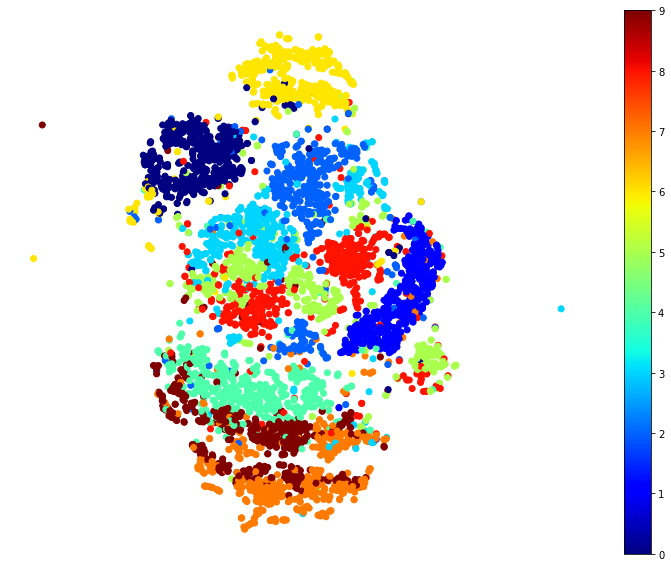

In [8]:
# TSNE

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from time import time

tsne = TSNE(n_components=2, random_state=42)
start = time()
X_reduced = tsne.fit_transform(X)
print(f"Training took {time() - start:.2f}")

def plot_clusters(X_reduced, y):
    plt.figure(figsize=(13,10))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
    plt.axis('off')
    plt.colorbar()
    plt.show()
plot_clusters(X_reduced, y)

# It took 55-ish seconds!!! to get this visualization.  However, as we look at it, TSNE did quite a good job separating these numbers using only 2 components (especially, 0, 6, and 8).  On the other hand, 4 and 9; 5 and 3, among others are quite difficult to visualize  

Training took 0.14


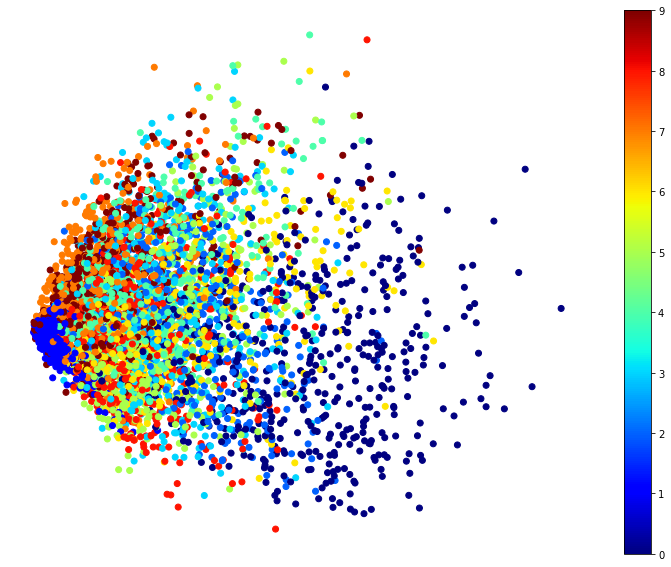

In [9]:
# PCA

from sklearn.decomposition import PCA

model = PCA(n_components=2, random_state=42)
start = time()
X_reduced = model.fit_transform(X)
print(f"Training took {time() - start:.2f}")

plot_clusters(X_reduced, y)

# Training took a lot less time, but it is not so linearly separable. Well, at least 0 has some clear boundary - mostly on the right. Let's try other algoritms.

Training took 39.55


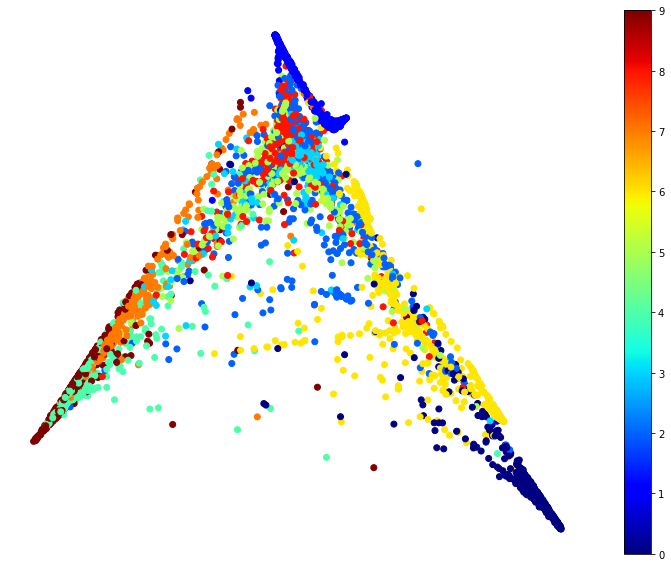

In [10]:
# LLE

from sklearn.manifold import LocallyLinearEmbedding

model = LocallyLinearEmbedding(n_components=2, random_state=42)
start = time()
X_reduced = model.fit_transform(X)
print(f"Training took {time() - start:.2f}")

plot_clusters(X_reduced, y)

# Hmm...this result seems to be slighly better than PCA.  We can see that 0 and 6 are quite separable but that's it!....it also take a lot of time!

Training took 14.86


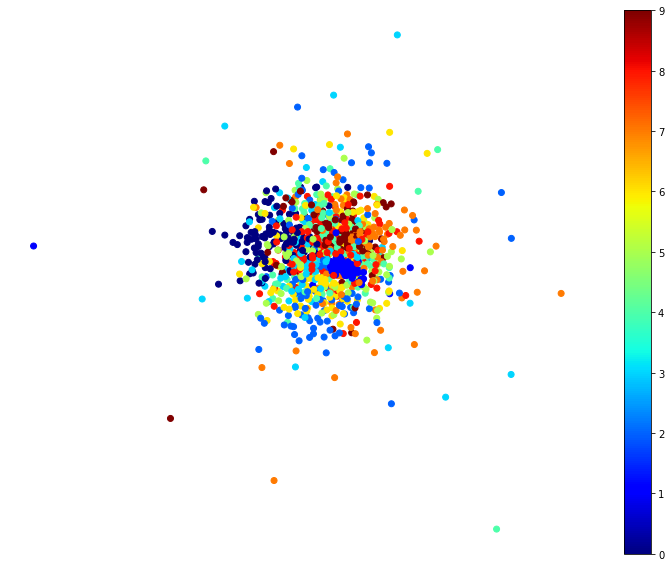

In [11]:
# MDS
from sklearn.manifold import MDS

model = MDS(n_components=2, random_state=42)
start = time()
X_reduced = model.fit_transform(X[:1000])
print(f"Training took {time() - start:.2f}")

plot_clusters(X_reduced, y[:1000])

# Never run MDS again....the time is just too horrible to think about the visualization, right?  The reason for its time is due to the fact that it has to calculate the distance between all pairs and this process will take a lot of time naturally.  Well, MDS also is not doing very well in discriminating the features either!

Training took 0.91


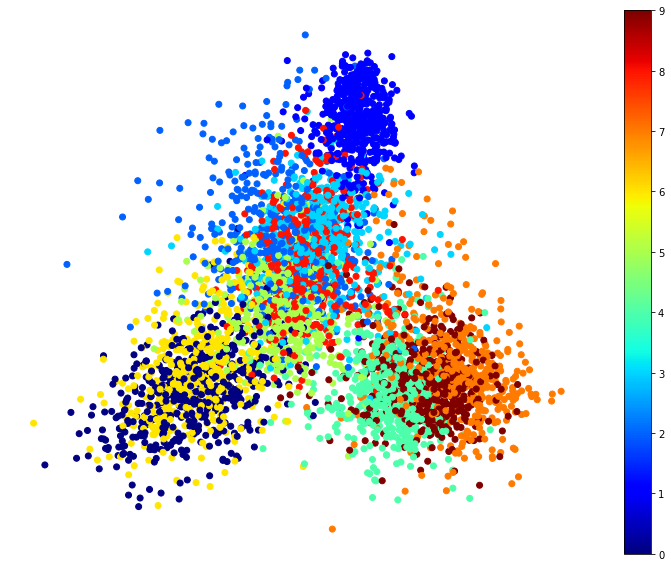

In [12]:
### Linear Discriminant Analysis

# LDA is originally for classification but it can also be equally applied as a dimensionality reduction technique by specifying the n_components.  The difference between LDA and PCA is that LDA finds what projection has maximum class separability while PCA finds what projection has maximal variances.  In addition, LDA is a supervised algorithm thus it requires supplying it with the y

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis(n_components=2)
start = time()
X_reduced = model.fit_transform(X, y)
print(f"Training took {time() - start:.2f}")

plot_clusters(X_reduced, y)

# Quite fast but lots of overlap...not good.

Training took 34.41


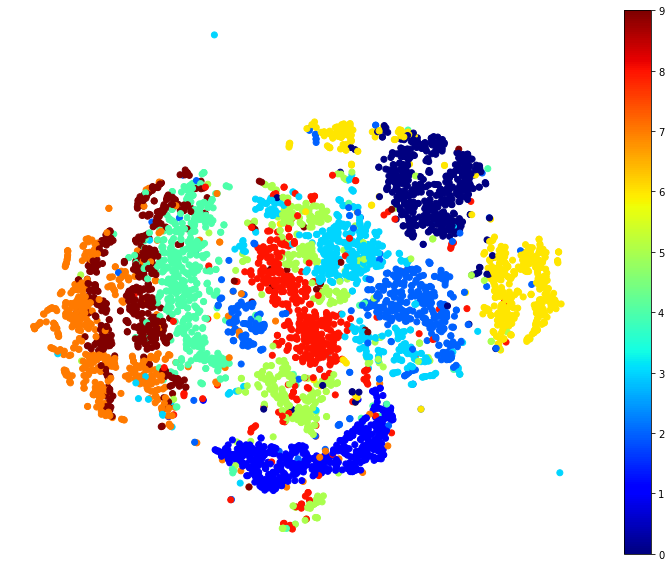

In [13]:
### PCA + TSNE

# This is a common way to reduce the time of TSNE by first using PCA to scale down the data only to 95% variance ratio, and fit it to TSNE.  Most of the time, it can reduce the time by almost 50% sometimes

from sklearn.pipeline import Pipeline

model = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])

start = time()
X_reduced = model.fit_transform(X)
print(f"Training took {time() - start:.2f}")

plot_clusters(X_reduced, y)

# Nice! We speed up the TSNE by first applying PCA.  As we look at the visualization, it seems it is quite comparable with pure tsne.

3. Attempt to compare the followings:

 1. SVM prediction with PCA of 0.99 explained variances
 2. SVM prediction with PCA of 0.90 explained variances

- you probably want to use grid search to find the best C and gamma
- since image is non-linear, it may be wise to use rbf/poly kernel
- since there are imbalanced set of target images, use class_weight='balanced'
- for pca, since we are working with images, with many correlated pixels
- it is useful to use whiten=True which will transform our covariance matrix to unit matrix (it is similar to standardizing your PCA)

How much time differences between the two?

How about the accuracy? (Hint: accuracy should be avoided in imbalanced dataset)

Is the result expected?

Total dataset size:
n_samples: 1288
n_features: 2914
n_classes: 7
=======Performing PCA========
PCA 90 took  0.02s
PCA 90 n_features:  81
PCA 99 took  0.03s
PCA 99 n_features:  370
=======Plotting images and their components========


Text(0.5, 1.0, 'Feature 1 - PCA 90')

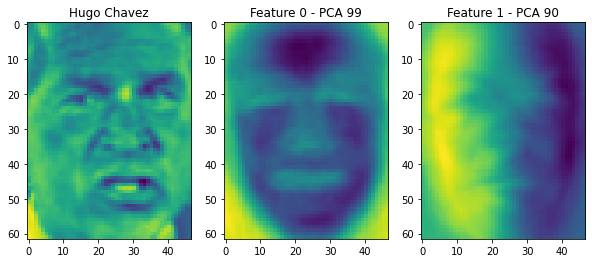

In [14]:
from sklearn.datasets import fetch_lfw_people

# Your code here

from time import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

lfw_people = fetch_lfw_people(min_faces_per_person=70)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

#splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

#scale helps svm since without scaling, svm
#tend to perform badly as it got influenced
#by bigger features.  Thus it is best
#to standardized the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("=======Performing PCA========")
pca90 = PCA(n_components=0.9, whiten=True).fit(X_train)
start = time()
X_train_reduced90 = pca90.transform(X_train)
X_test_reduced90 = pca90.transform(X_test)
pca90faces = pca90.components_.reshape((X_train_reduced90.shape[1], h, w))
print(f"PCA 90 took {time() - start: .2f}s")
print("PCA 90 n_features: ", X_train_reduced90.shape[1])

pca99 = PCA(n_components=0.99, whiten=True).fit(X_train)
start = time()
X_train_reduced99 = pca99.transform(X_train)
X_test_reduced99 = pca99.transform(X_test)
pca99faces = pca99.components_.reshape((X_train_reduced99.shape[1], h, w))

print(f"PCA 99 took {time() - start: .2f}s")
print("PCA 99 n_features: ", X_train_reduced99.shape[1])

_, ax = plt.subplots(1, 3, figsize=(10, 10))

print("=======Plotting images and their components========")

ax[0].imshow(X_train[0].reshape(h, w))
ax[0].set_title(target_names[y[0]])

ax[1].imshow(pca99faces[0].reshape((h, w)))
ax[1].set_title(f"Feature 0 - PCA 99")

ax[2].imshow(pca99faces[1].reshape((h, w)))
ax[2].set_title(f"Feature 1 - PCA 90")

#this is also known as eigenfaces

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from time import time
from sklearn.metrics import classification_report, average_precision_score
from sklearn.pipeline import make_pipeline

def search_and_predict(X_train, X_test, y_train, y_test):
    start = time()
    #default kernel is rbf anyway
    svc = SVC(kernel='rbf', class_weight='balanced')
    param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]} 
    grid = GridSearchCV(svc, param_grid)
    grid.fit(X_train, y_train)
    print("Best estimator: ", grid.best_estimator_)
    print(f"Search took {time() - start: .2f}")
    start = time()
    pred = grid.predict(X_test)
    print(f"Prediction took {time() - start: .2f}")
    print("Classification report: ")
    print(classification_report(y_test, pred, target_names=target_names))


In [16]:
print("===PCA 99=====")
search_and_predict(X_train_reduced99, X_test_reduced99, y_train, y_test)

===PCA 99=====
Best estimator:  SVC(C=10, class_weight='balanced', gamma=0.0001)
Search took  69.61
Prediction took  0.19
Classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       0.59      0.72      0.65        18
     Colin Powell       0.68      0.84      0.75        69
  Donald Rumsfeld       0.63      0.76      0.69        34
    George W Bush       0.93      0.81      0.86       166
Gerhard Schroeder       0.66      0.68      0.67        31
      Hugo Chavez       0.85      0.58      0.69        19
       Tony Blair       0.70      0.70      0.70        50

         accuracy                           0.77       387
        macro avg       0.72      0.73      0.72       387
     weighted avg       0.79      0.77      0.77       387



In [17]:
print("===PCA 90=====")
search_and_predict(X_train_reduced90, X_test_reduced90, y_train, y_test)

===PCA 90=====
Best estimator:  SVC(C=10, class_weight='balanced', gamma=0.01)
Search took  15.54
Prediction took  0.04
Classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.61      0.76        18
     Colin Powell       0.81      0.93      0.86        69
  Donald Rumsfeld       0.96      0.68      0.79        34
    George W Bush       0.84      0.97      0.90       166
Gerhard Schroeder       0.83      0.77      0.80        31
      Hugo Chavez       0.91      0.53      0.67        19
       Tony Blair       0.90      0.76      0.83        50

         accuracy                           0.86       387
        macro avg       0.89      0.75      0.80       387
     weighted avg       0.86      0.86      0.85       387



Since this is a very imbalanced dataset (look at the support column), it would be a crime to judge the effectiveness using accuracy.  More useful metric is likely f1-score since we don't know whether we want to prioritize recall or precision.  Looking at the f1score mean across all class, the f1 scores best when n_component is around 0.9 (indeed, we can confirm with grid search below).  This informs us couple of things:

1. Sometimes, dimensionality reduction in a way remove noise and feed the "cleaner" data to the model, in this case the SVC, and can increase the score
2. Higher explained ratio, 0.99, may not necessarily result in higher accuracy than 0.9, for example.  The explanation is basically the same as 1, which is related to removing "unnecessary information".  But often, it may be worthwhle to put in the GridSearch and find the best dimension to reduce
3. The speed gain from PCA 90 is incredible.  Not to mention it also increases the accuracy.  Thus it is sometimes worth exploring dimensionality reduction.

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from time import time
from sklearn.metrics import classification_report, average_precision_score
from sklearn.pipeline import make_pipeline

#improve code so we simply search the best
#but it can take a long time!
def search_and_predict(X_train, X_test, y_train, y_test):
    start = time()
    pca = PCA(n_components=0.5, whiten=True, random_state=42)
    svc = SVC(kernel='rbf', class_weight='balanced')
    model = make_pipeline(pca, svc)
    param_grid = {'svc__C': [1, 10, 100, 1000],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], 
            'pca__n_components': [0.1, 0.5, 0.7, 0.9, 0.99]} 
    grid = GridSearchCV(model, param_grid)
    grid.fit(X_train, y_train)
    print("Best estimator: ", grid.best_estimator_)
    print(f"Search took {time() - start: .2f}")
    start = time()
    pred = grid.predict(X_test)
    print(f"Prediction took {time() - start: .2f}")
    print("Classification report: ")
    print(classification_report(y_test, pred, target_names=target_names))
search_and_predict(X_train, X_test, y_train, y_test)

Best estimator:  Pipeline(steps=[('pca', PCA(n_components=0.9, random_state=42, whiten=True)),
                ('svc', SVC(C=100, class_weight='balanced', gamma=0.01))])
Search took  286.23
Prediction took  0.04
Classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.61      0.76        18
     Colin Powell       0.81      0.93      0.86        69
  Donald Rumsfeld       0.92      0.68      0.78        34
    George W Bush       0.85      0.97      0.90       166
Gerhard Schroeder       0.83      0.77      0.80        31
      Hugo Chavez       0.91      0.53      0.67        19
       Tony Blair       0.90      0.76      0.83        50

         accuracy                           0.86       387
        macro avg       0.89      0.75      0.80       387
     weighted avg       0.86      0.86      0.85       387



4. Convert the above PCA using kernel PCA, where we convert our X using rbf kernels.  You may want to see how to transfer your data to another space via https://en.wikipedia.org/wiki/Radial_basis_function_kernel and this http://rasbt.github.io/mlxtend/user_guide/feature_extraction/RBFKernelPCA/#References. For those who are confused what is x and x' (prime), they are basically each sample, so you may want to first find the squared distances between each sample.  Apply your kernel PCA with a sklearn datasets make_swiss_roll

#### More details on Kernel PCA

The steps are as follows:

1). Calculate (x-x')^2

For your convenience, to get the squared distances can be done using the pdist module. Then transform it into a square form using squareform module.

<code>from scipy.spatial.distance import pdist </code>

<code>distances = pdist(X, 'sqeuclidean')</code>

<code>matrix = squareform(squared_distances)</code>

BTW, if you prefer the numpy way, it is also perfectly fine!

2). Center the data

This is a bit tricky but http://rasbt.github.io/mlxtend/user_guide/feature_extraction/RBFKernelPCA/#References has provided us how to center the rbf data.

3). Calculate rbf = exp(-gamma * matrix)

As for gamma, you can actually pick whatever gamma you prefer. Then you would want to calculate the rbf kernel

<code>rbf = np.exp(-gamma * matrix)</code>

once you obtain the rbf, you DO NOT need to input into the np.cov, because by performing squared_distances we are actually doing covariances but in rbf space. 

(Notice we are not doing x - x' in normal covariance way, but (x - x')^2)

4).  Use eig to calculate the eigenvectors and values

5). Get the projection and plot it. 

When you project your data, you do rbf @ eigenvectors, NOT X @ eigenvectors since your eigenvectors are in rbf space

yes, that's it!

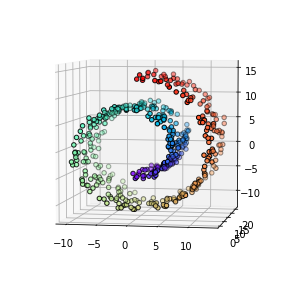

In [20]:
#use the following data
from sklearn import manifold, datasets

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

#elevation and #azimuth
ax.view_init(5, -80)

X, color = datasets.make_swiss_roll(n_samples=500, noise=0.3)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap="rainbow",
          edgecolor='k')

Kernel shape:  (1500, 1500)
Variance explained_ratio:  [0.58711488 1.        ]
Eigenvalues:  (2,)
Eigenvectors (column-wise):  (1500, 2)
Mean:  [ 0.03351168 -0.00408072]
Old X shape:  (1500, 3)
Projected X shape:  (1500, 2)


(-0.02034018855040179,
 0.021756380373032538,
 -0.01891328359368973,
 0.019806884649449543)

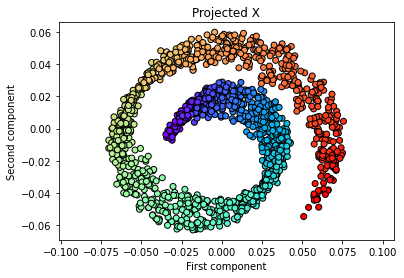

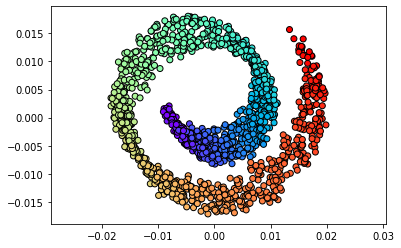

In [21]:
# Your code here

from scipy.spatial.distance import pdist, squareform
import numpy as np

from sklearn import manifold, datasets

def custom_svd(X):
    U, S, VT = np.linalg.svd(X, full_matrices=True)
    eigenvalues = np.square(S)/(X.shape[0]-1)
    eigenvectors = VT.T
    
    #projected X = US
    #we need to pad zero for Sigma since m > n
    Sigma = np.zeros((X.shape[0], X.shape[1]), dtype=float)
    Sigma[:X.shape[1], :X.shape[1]] = np.diag(S)
    projected_X = U @ Sigma
    
    return eigenvalues, eigenvectors, projected_X


X, color = datasets.make_swiss_roll(n_samples=1500, noise=0.3)

#see below cell for numpy way
squared_distances = pdist(X, 'sqeuclidean')
squared_distances_matrix = squareform(squared_distances)

#make sure that each sample is subtracted with each sample
assert X.shape[0], X.shape[0] == squared_distances_matrix.shape 

#let's say we have gamma 0.00001
#Recap: smaller gamma gives you low bias and high variance
#large gamma will give you higher bias and low variance
#Basically, gamma is 1/(2*sigma^(2)) but we simply make it easier
#thus if we choose very big sigma (high variance), then gamma will be small
#hence smaller gamma gives you higher variance
gamma = 0.00001

#you should be able to use scipy version of exp too!
rbf = np.exp(-gamma * squared_distances_matrix)
print("Kernel shape: ", rbf.shape)

#since we did not perform any centering yet, 
#we can use this formula K′=K−1_{N}K−K1_{N}+1_{N}K1_{N}
#this 1_{n} is a N X N matrix with all values equal to 1/N
n_samples = X.shape[0]
one_over_n = np.ones((n_samples, n_samples)) / n_samples
rbf = rbf - (one_over_n @ rbf) - (rbf @ one_over_n) + (one_over_n @ rbf @ one_over_n)    
    
#rbf is essentially covariances in rbf space, so simply insert the rbf inside the eig func
eigenvalues, eigenvectors, _ = custom_svd(rbf)

# sorting eigenvalues from biggest to smallest
ix = np.argsort(eigenvalues)[::-1]

#hard code it
n_components = 2

if(n_components > eigenvalues.shape[0]):
    raise Exception("You cannot have n_components more than number of features!")
else:
    eigenvalues, eigenvectors = eigenvalues[ix], eigenvectors[:, ix]
    #I did not have .T here since I will not be looping
    eigenvalues, eigenvectors = eigenvalues[:n_components], eigenvectors[:,:n_components]
        
    #define how much variance is gained after each component
    variance_explained_ratio = np.cumsum(eigenvalues)/np.sum(eigenvalues)

    #projected new vector
    #instead of projecting the X to the eigenvectors
    #we project the kernel onto the eigenvectors
    projected_X = rbf @ eigenvectors
    
    #print all info
    print("Variance explained_ratio: ", variance_explained_ratio) #first component got 97%
    print("Eigenvalues: ", eigenvalues.shape)
    print("Eigenvectors (column-wise): ", eigenvectors.shape)
    print("Mean: ", mean)
    print("Old X shape: ", X.shape)
    print("Projected X shape: ", projected_X.shape)

#projection
plt.figure()
plt.scatter(projected_X[:, 0], projected_X[:, 1], c=color,
           cmap="rainbow", edgecolor='k')
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Projected X")
plt.axis('equal')

#compare with sklearn kernel pca
from sklearn.decomposition import KernelPCA
model = KernelPCA(kernel="rbf", n_components=2,
                 gamma=0.000001)
out = model.fit_transform(X)
plt.figure()
plt.scatter(out[:, 0], out[:, 1], c=color, cmap="rainbow",
          edgecolor='k')
plt.axis('equal')

In [22]:
#for those who do not understand what does pdist and squareform does
test = np.arange(6).reshape((3, 2))
print("Input data: ", test)

sq = pdist(test, 'sqeuclidean')
print("Square distance: ", sq)

some_mat = squareform(sq)
print("Matrix form: ", some_mat)

#basically it is just (x - x')^2 along the columns (feature space)

#numpy way
print("Numpy: ", ((test[:, np.newaxis, :] - test[np.newaxis, :, :]) ** 2).sum(2))

#sklearn way
from sklearn import metrics
m = metrics.pairwise_distances(test, test)
print("Sklearn way: ", m**2)

Input data:  [[0 1]
 [2 3]
 [4 5]]
Square distance:  [ 8. 32.  8.]
Matrix form:  [[ 0.  8. 32.]
 [ 8.  0.  8.]
 [32.  8.  0.]]
Numpy:  [[ 0  8 32]
 [ 8  0  8]
 [32  8  0]]
Sklearn way:  [[ 0.  8. 32.]
 [ 8.  0.  8.]
 [32.  8.  0.]]


5. Implement ISOmap from scratch. Reduced to 200 samples for peace of mind.
<code>X, color = datasets.make_swiss_roll(n_samples=200, noise=0.3)</code>

Since ISOmap is essential very similar to MDS but instead of a simple distance matrix, it feeds in a shortest path matrix instead, hence the geodesic distances.

First, compute the distances.  Make sure it is euclidean for this step. Also make sure that the distance matrix should have values for only the nth nearest neighbors. Otherwise, values should be infinity. Infinity will be later on used by Floyd algorithm to determine the shortest paths. Last, treat this distance matrix as undirected graph, which means <code>distance\[i\]\[j\]</code> should be same as <code>distance\[j\]\[i\]</code>

Second, input the distance matrix into Floyd algorithm. This part can be unfamiliar for those who did not study Data Structures and Algorithms.  
Floyd Warshall algorithm is basically a all-pairs shortest-path algorithm. It is pretty straightforward algorithm in which you loop through all possible pair of vertices and their possible paths and keep on updating if shorter path is found. 
This is implemented based on pseudocode given in https://en.wikipedia.org/wiki/Floyd–Warshall_algorithm.
For those who want to first get an intuition, watch this https://www.youtube.com/watch?v=4OQeCuLYj-4.
Here is how the floyd algorithm can be implemented in Python


In [23]:
def floydWarshall(distance_matrix):
    #shorten the name for shorter code!
    #I write the long name as param so you guys will know
    #what is it that is being input to floyd
    dist = distance_matrix
    length = len(dist)
    for k in range(length):
        for i in range(length):
            for j in range(length):
                dist[i][j] = min(dist[i][j],dist[i][k] + dist[k][j])
    return graph_matrix

Third, you need to feed the graph matrix to the MDS algorithm. This MDS algorithm is quite straightforward as well.
For simplicity, you can follow the steps written in https://en.wikipedia.org/wiki/Multidimensional_scaling in topic "Steps of a classical MDS algorithm"

1. Squared the incoming matrix return my floyd

2. Perform double centering which center the data, and remove asymmetrical distances by multiplying 0.5

3. Use elg() to find eigenvalues and eigenvectors

4. The new X = Em(Am)^1/2, where EM is eigenvectors and Am is the diagonal matrix of eigenvalues

Phew, it may look hard, but it is always satisfying to understand the math behind!

In [24]:
#Implement ISOmap from scratch
#reduced to 200 samples for peace of mind
X, color = datasets.make_swiss_roll(n_samples=200, noise=0.3)

# Your code here

Variance explained_ratio:  [0.52285676 1.        ]
Eigenvalues:  (2,)
Eigenvectors (column-wise):  (200, 2)
Mean:  [ 0.03351168 -0.00408072]
Old X shape:  (200, 3)
Projected X shape:  (200, 2)


(-16.01219437959656,
 19.369244469734976,
 -18.82425874297366,
 20.190694005149844)

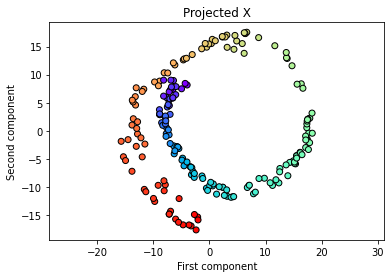

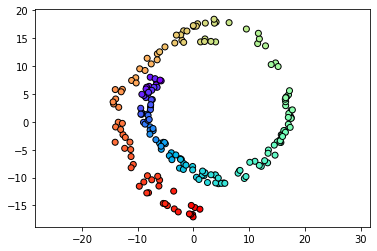

In [25]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

from sklearn import manifold, datasets
from scipy.sparse.csgraph import shortest_path

#reduced to 300 samples for peace of mind
X, color = datasets.make_swiss_roll(n_samples=200, noise=0.3)

#copy the floyd warshall algorithm from above
#you can actually use this as well:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.floyd_warshall.html
def floyd(distance_matrix):
    #shorten the name for shorter code!
    #I write the long name as param so you guys will know
    #what is it that is being input to floyd. Does not hurt to
    #make things more readable
    dist = distance_matrix
    length = len(dist)
    for k in range(length):
        for i in range(length):
            for j in range(length):
                dist[i][j] = min(dist[i][j],dist[i][k] + dist[k][j])
    return dist

#very similar to above but use euclidean 
#since Floyd uses that
#Also, do not forget to only assign distance of nearest neighbors
#to the distance matrix
def make_dist_matrix(X, n_neighbors=10):
    
    #find distance matrix
    dist_mat = squareform(pdist(X, 'euclidean'))
    #make sure that each sample is subtracted with each sample
    assert X.shape[0], X.shape[0] == dist_mat.shape 
    
    n_samples = X.shape[0]
    dist = np.ones((n_samples, n_samples)) * np.inf
    for i in range(n_samples):    
        #get n nearest neighbors
        index_arr = np.argsort(dist_mat[i])[:n_neighbors]
        #put only n nearest neighbors distance into the matrix
        #otherwise, let it be infinity
        for j in index_arr:
            dist[i][j] = dist_mat[i][j]
            #i j is same as j i for undirected matrix
            #clearly, mds or isomap does not care about direction
            #it only cares about the neighbors, thus we
            #need to treat this matrix as undirected graph
            dist[j][i] = dist_mat[i][j]

    return dist
    
#very similar to kernel pca (since rbf is kinda like gaussian, right?)
def mds(graph_mat):
    mat = graph_mat**2
    n_samples = graph_mat.shape[0]

    #we can center the data using "centering matrix"
    #https://en.wikipedia.org/wiki/Centering_matrix
    identity = np.identity(n_samples)
    ones = np.ones((n_samples, n_samples))
    
    #C_{n} = I_{n} - 1/n * 11.T
    centering_matrix = identity -  (1/n_samples) * ones 
    
    #centering_mat @ mat removes the mean from each of n columns
    #mat @ centering_mat removes the mean from each of m rows
    #by doing both, both row and column means are equal to zero
    #-0.5 is for "double centering" as specify in step 2 in the wikipedia
    mat = -0.5 * (centering_matrix @ mat @ centering_matrix)
    
    #mat is essentially covariances in gaussian space (i.e., nearest neighbors)
    eigenvalues, eigenvectors = np.linalg.eig(mat)

    # sorting eigenvalues from biggest to smallest
    ix = np.argsort(eigenvalues)[::-1]

    #hard code it
    n_components = 2

    if(n_components > eigenvalues.shape[0]):
        raise Exception("You cannot have n_components more than number of features!")
    elif(n_components > n_samples):
        #https://stackoverflow.com/questions/51040075/why-sklearn-pca-needs-more-samples-than-new-featuresn-components
        raise Exception("You also cannot have n_components more than number of samples!  You won't be able to find the eigenvalues and vectors!")
    else:
        eigenvalues, eigenvectors = eigenvalues[ix], eigenvectors[:, ix]
        eigenvalues, eigenvectors = eigenvalues[:n_components], eigenvectors[:,:n_components]

        #define how much variance is gained after each component
        variance_explained_ratio = np.cumsum(eigenvalues)/np.sum(eigenvalues)

        #projected new vector
        #based on https://en.wikipedia.org/wiki/Multidimensional_scaling
        #"Steps of a classical MDS algorithm - Step 4"
        Em = eigenvectors
        Am = np.diag(eigenvalues)
        projected_X = Em @ np.sqrt(Am)

        #print all info
        print("Variance explained_ratio: ", variance_explained_ratio) #first component got 97%
        print("Eigenvalues: ", eigenvalues.shape)
        print("Eigenvectors (column-wise): ", eigenvectors.shape)
        print("Mean: ", mean)
        print("Old X shape: ", X.shape)
        print("Projected X shape: ", projected_X.shape)
        
        return projected_X
        
#first, find the euclidean distance matrix
#then, find the shortest path matrix based on floyd which
#gives the geodesic distance
#last, input into mds

# projected_X = mds(shortest_path(make_dist_matrix(X, n_neighbors=10), method='FW', directed=False))
projected_X = mds(floyd(make_dist_matrix(X, n_neighbors=10)))

#projection
plt.figure()
plt.scatter(projected_X[:, 0], projected_X[:, 1], c=color,
           cmap="rainbow", edgecolor='k')
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Projected X")
plt.axis('equal')

#compare with sklearn isomap
from sklearn.manifold import Isomap
model = Isomap(n_neighbors=10, n_components=2)
out = model.fit_transform(X)
plt.figure()
plt.scatter(out[:, 0], out[:, 1], c=color, cmap="rainbow",
          edgecolor='k')
plt.axis('equal')